In [1]:
from src.data_preprocessing import *

df = load_data('../data/jobfair_train.csv')

columns_to_normalize = [
    'days_active_last_28_days', 'session_count_last_28_days',
    'avg_stars_top_11_players']

columns_to_drop = [
    'morale_boosters_stash', 'rests_stash', 'tokens_stash', 'tokens_spent_last_28_days',
    'avg_training_factor_top_11_players', 'avg_age_top_11_players',
    'league_match_watched_count_last_28_days', 'global_competition_level',
    'avg_stars_top_14_players', 'days_active_last_28_days', 'session_count_last_28_days',
    'playtime_last_28_days', 'league_match_won_count_last_28_days', 'training_count_last_28_days',
    'avg_stars_top_11_players', 'global_competition_level', 'club_id','cohort_season','season','dynamic_payment_segment', 'registration_country', 'registration_platform_specific'
]

df = preprocess_data(df, columns_to_normalize, columns_to_drop)

In [2]:
from src.models import *
from src.utils import *

pca_model, principal_components = getPcaModel(df, n_components=2, random_state=42)

print(f'Varience: {sum(pca_model.explained_variance_ratio_) * 100:.1f}%')
visualize_principal_components(principal_components, n_principal_components=2, target_col=df['league_rank'], n_samples=200)


Varience: 93.6%


In [3]:
X_train, X_test, y_train, y_test = league_test_split(df, test_size=0.2, random_state=42)

In [4]:
model_rf = getRandomForestClassifier(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

In [5]:
model_mlp = getMLPClassifier(X_train, y_train)
predictions_mlp = model_mlp.predict(scale(X_test))


Model: MLPClassifier
Accuracy: 0.2023


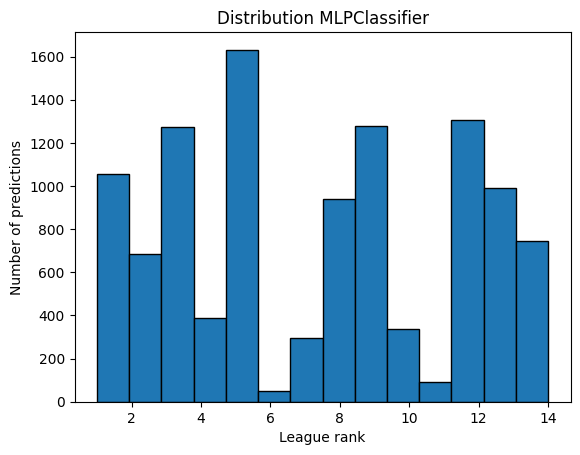

Model: Random Forest Classifier
Accuracy: 0.1971


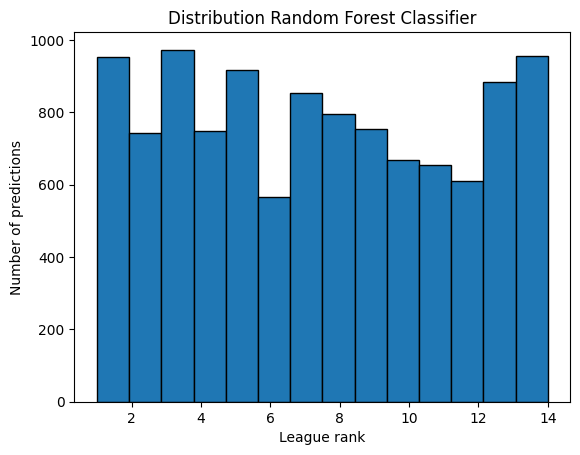

In [6]:
from src.model_evaluation import *

model_predictions = [('MLPClassifier', predictions_mlp), ('Random Forest Classifier', predictions_rf)]

for model_name, predictions in model_predictions:
    evaluate_model_performance(model_name, y_test, predictions, X_test.shape[1], print_accuracy=True)
    plot_predictions_distribution(model_name, y_test, predictions)
